## Name : Shashi Preetham

## **The Sparks Foundation - Graduate Rotational Internship Program**
### Domain: Data Science & Business Analytics  

### Task 1 - Prediction using Supervised ML

- Predict the percentage of marks that a student is expected to score based upon the number of hours they studied.
- This is a simple linear regression task as it involves 2 variables: [Hours, Scores]

### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
sns.set()

### Reading data from Dataset

In [2]:
df = pd.read_csv("http://bit.ly/w-data")
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Visualizing Data

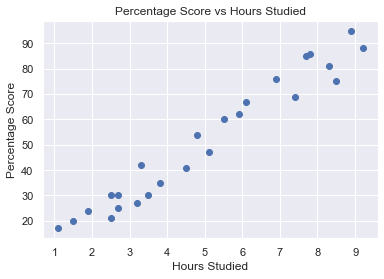

In [5]:
df.plot(x='Hours', y='Scores', style='o', legend=False)  
plt.title('Percentage Score vs Hours Studied')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the above graph, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### Preparing the data

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [6]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

Splitting this data into training and test sets using Scikit-Learn's built-in train_test_split() method:

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.8, test_size=0.2, 
                                                    random_state=42)

### Training the Algorithm

In [8]:
regressor = LinearRegression()  
regressor.fit(X_train.reshape(-1,1), y_train)
print("Training complete.")

Training complete.


### Plotting the Regression line

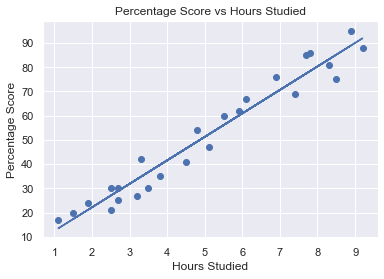

In [9]:
# Calculating best-fit line
line = regressor.coef_*X + regressor.intercept_
plt.scatter(X, y)
plt.plot(X, line);
plt.title('Percentage Score vs Hours Studied')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

### Making Predictions

In [10]:
# Testing data - In Hours
print(X_test)

# Predicting the scores
y_pred = regressor.predict(X_test)

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


### Comparing Actual vs Predicted Model Result

In [11]:
dfs = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
dfs 

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [12]:
print("Training Score:", regressor.score(X_train,y_train))
print("Test Score:", regressor.score(X_test,y_test))

Training Score: 0.9491209376364416
Test Score: 0.9678055545167994


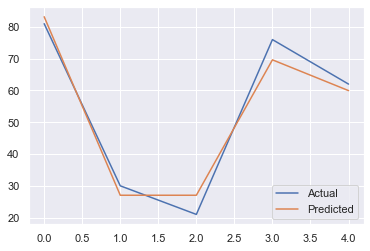

In [13]:
# Visualizing difference between the actual and predicted value

dfs.plot(kind='line')
plt.show()

### What will be the predicted score if a student studies for 9.25 hours/day?

In [14]:
hours = 9.25
test_hour = np.array([[hours]])
pred = regressor.predict(test_hour)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = 9.25
Predicted Score = 92.38611528261494


### Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. Let us consider different methods of calculating errors:

In [15]:
print('Mean Squared Error:', 
      metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 
print('Root Mean Squared Error:', 
      np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', 
      metrics.r2_score(y_test, y_pred))

Mean Squared Error: 18.943211722315272
Mean Absolute Error: 3.9207511902099244
Root Mean Squared Error: 4.352380006653288
R-2: 0.9678055545167994


### Conclusion

**R<sup>2</sup> (coefficient of determination) regression score = 0.967, shows that this model performs exceptionally well.**